In [13]:
#Importing libraries and loading dataset
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

org_col_names=["No", "year","month", "day", "hour", "pm2.5", "DEWP","TEMP", "PRES", "cbwd", "Iws", "Is", "Ir"]
col_names = ['pollution', 'dew', 'temp', 'pressure', 'w_dir', 'w_speed', 'snow', 'rain']

dataset = pd.read_csv('AirPollution.csv',index_col=0, date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])

/tmp/ipython-input-4263817081.py:14: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  dataset = pd.read_csv('AirPollution.csv',index_col=0, date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])
/tmp/ipython-input-4263817081.py:14: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = pd.read_csv('AirPollution.csv',index_col=0, date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])


In [14]:
dataset.head()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [15]:
# Data cleaning
dataset.drop('No', axis=1, inplace=True)
dataset.columns = col_names
dataset['pollution'].fillna(0, inplace=True)
dataset = dataset[24:] # drop the first day
print(dataset.head(5))
dataset.to_csv('pollution.csv') # save new CSV

/tmp/ipython-input-751815571.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['pollution'].fillna(0, inplace=True)


                     pollution  dew  temp  pressure w_dir  w_speed  snow  rain
year_month_day_hour                                                           
2010-01-02 00:00:00      129.0  -16  -4.0    1020.0    SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0    1020.0    SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0    1021.0    SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0    1022.0    SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0    1022.0    SE     6.25     2     0


In [16]:
# load dataset
df = pd.read_csv('pollution.csv', header=0, index_col=0)
df.describe()

,pollution,dew,temp,pressure,w_speed,snow,rain
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,94.013516,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023
std,92.252276,14.429326,12.193384,10.271411,50.022729,0.760582,1.416247
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,24.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,68.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,132.250000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [17]:
dataset_columns = df.columns.tolist()
dataset_columns

['pollution', 'dew', 'temp', 'pressure', 'w_dir', 'w_speed', 'snow', 'rain']

<Axes: >

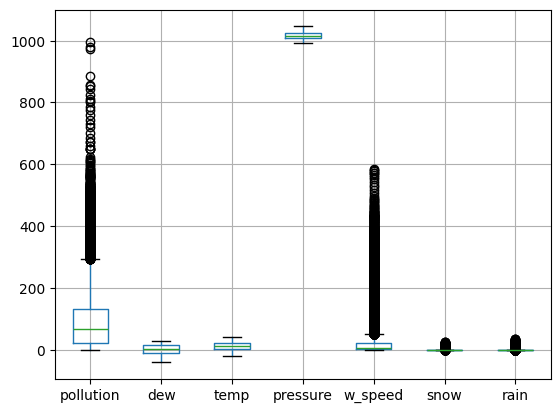

In [18]:
#Box plot
#pd.options.display.mpl_style = False
df.boxplot()

In [19]:
df

,pollution,dew,temp,pressure,w_dir,w_speed,snow,rain
year_month_day_hour,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


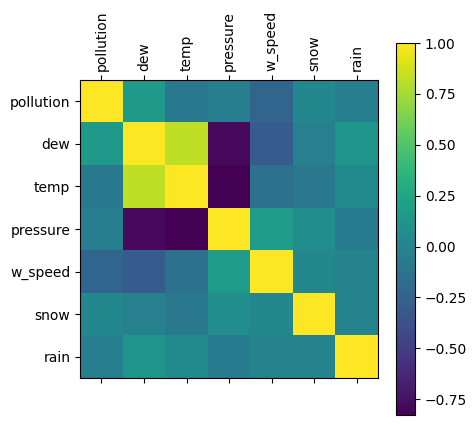

In [20]:
# Analysing relationship between different features
# To calculate the correlation matrix, we need to ensure all columns are numerical.
# The 'w_dir' column contains categorical string values, which cannot be directly used in correlation calculation.

# Create a copy of the dataframe and drop the non-numeric 'w_dir' column for correlation calculation
df_numerical = df.drop(columns=['w_dir'])

# Get the list of column names for the numerical dataframe to use as labels for the plot
cor_cols_numerical = df_numerical.columns.tolist()

# Generate the correlation matrix using df_numerical.corr()
# The plt.matshow() function visualizes this matrix as a heatmap.
plt.matshow(df_numerical.corr())

# Set the x-axis ticks to correspond to the numerical column names
# Rotate the labels by 90 degrees for better readability, especially if there are many columns.
plt.xticks(range(len(cor_cols_numerical)), cor_cols_numerical, rotation=90)

# Set the y-axis ticks to correspond to the numerical column names
plt.yticks(range(len(cor_cols_numerical)), cor_cols_numerical)

# Add a color bar to the plot, which indicates the scale of correlation values.
plt.colorbar()

# Display the plot.
plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder

# Encode non-numerical values in the 'w_dir' column (index 4) using LabelEncoder.
# LabelEncoder transforms categorical text data into numerical labels.
# It's important to convert categorical features to numerical representations for machine learning models.
values = df.values
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])

# Convert the entire 'values' array to float32 type.
# This ensures all data is in a consistent numerical format for further processing and model input.
values = values.astype('float32')

# Display the encoded 'w_dir' column (index 4) to show the numerical representation.
values[:,4]

array([2., 2., 2., ..., 1., 1., 1.], dtype=float32)

In [38]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler. This scaler transforms features by scaling each feature to a given range, typically (0, 1).
# Normalization is crucial for neural networks like LSTMs, as it can help them converge faster and perform better.
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply the scaler to the 'values' array. The fit_transform method calculates the minimum and maximum values
# for each feature and then scales the data accordingly.
scaled_dataset = scaler.fit_transform(values)

In [39]:
#Creating a window for previous data
# This function converts the time series data into a supervised learning problem.
# It creates input-output pairs where the input is a sequence of 'window_size' observations
# and the output is the next observation (specifically, the 'pollution' value).
def to_supervised(train):
  window_size = 4 # Define the number of previous time steps to use as input features
  X = [] # Initialize list to store input sequences
  Y = [] # Initialize list to store output (target) values
  for i in range(window_size, len(train)): # Iterate through the training data starting from 'window_size'
    X.append(train[i-window_size:i,:]) # Append a sequence of 'window_size' previous observations to X
    Y.append(train[i,0:1]) # Append the 'pollution' value (first column) at the current time step to Y

  return X,Y

In [40]:
X, Y = to_supervised(scaled_dataset)

# Convert the lists X and Y into NumPy arrays. This is a common practice
# as NumPy arrays are efficient for numerical operations and are required
# as input for Keras/TensorFlow models.
X = np.array(X)
Y = np.array(Y)

# Print the shape of Y (output/target variable).
# Y.shape should be (number_of_samples, number_of_features_to_predict).
# Here, it's (43796, 1), meaning 43796 samples and 1 feature (pollution) being predicted.
print('Y' ,Y.shape)

# Print the shape of X (input features/sequences).
# X.shape should be (number_of_samples, window_size, number_of_features).
# Here, it's (43796, 4, 8), meaning 43796 samples, each with a sequence of 4 time steps,
# and each time step having 8 features (pollution, dew, temp, etc.).
print('X' ,X.shape)

Y (43796, 1)
X (43796, 4, 8)


In [41]:
#Splitting the dataset
# Define the number of training samples. Here, it's set to 24 hours * 365 days,
# which typically represents one full year of hourly data for training.
n_train = 24*365

# Split the input features (X) into training and testing sets.
# X_train contains data from after the n_train mark, and X_test contains the first n_train samples.
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

# Split the target variable (Y) into training and testing sets using the same split point.
Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (35036, 4, 8)
X_test (8760, 4, 8)
Y_train (35036, 1)
Y_test (8760, 1)


In [26]:
#Importing LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM

# Initialize a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add the first LSTM layer.
# 'units=50' means 50 memory units (neurons) in the layer.
# 'return_sequences=True' ensures that the LSTM layer returns the full sequence of outputs
# for each timestep, which is necessary when stacking multiple LSTM layers.
# 'input_shape' specifies the shape of the input data: (timesteps, features).
model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
# Add a Dropout layer to prevent overfitting. Dropout randomly sets a fraction (0.2 or 20%) of input units to 0 at each update during training.
model.add(Dropout(0.2))

# Add a second LSTM layer. 'return_sequences=True' is still needed as there's another LSTM layer stacked after this one.
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Add a third LSTM layer. 'return_sequences=False' (default) means this layer will only return the output for the last timestep,
# as it's the last LSTM layer before the output Dense layer.
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Add a Dense (fully connected) output layer with 1 unit, as we are predicting a single pollution value.
model.add(Dense(units = 1))

# Compile the model.
# 'optimizer = 'adam'' is a popular optimization algorithm.
# 'loss = 'mean_squared_error'' is a common loss function for regression problems, measuring the average squared difference between the estimated and actual values.
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
#Train the model
# The model is trained using the fit method.
# X_train: Training input data (sequences of past observations).
# Y_train: Training target data (the pollution value to predict).
# epochs: The number of times the model will iterate over the entire training dataset.
#         More epochs can lead to better learning, but also risk overfitting.
# batch_size: The number of samples per gradient update. A smaller batch size means more frequent updates,
#             while a larger batch size provides a more accurate estimate of the gradient.
model.fit(X_train, Y_train, epochs = 20, batch_size = 32)

Epoch 1/20
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 7.9841e-04
Epoch 2/20
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 7.4675e-04
Epoch 3/20
 102/1095 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 5.9860e-04

KeyboardInterrupt: 

In [28]:
#Taking predictions
from keras.models import load_model
model.save('AirPollutionMultivariate.h5')

In [29]:
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

rmse = np.sqrt(mse)
rmse

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


np.float64(0.029302745469351906)

In [30]:
#Y_predicted = scaler.inverse_transform(Y_pred)
print('y_predicted',Y_pred.shape)
#print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)
print('scaled Values shape', scaled_dataset.shape)

y_predicted (8760, 1)
X_test (8760, 4, 8)
scaled Values shape (43800, 8)


In [31]:
#Scaling back to the original scale
d = scaled_dataset[:8760,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:8760,1:]), axis =1)
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test, d[:8760,1:]), axis = 1)
print('concat Y_test', Y_test.shape)

dummy (8760, 8)
Y_pred (8760, 1)
concat y_pred (8760, 1)
concat Y_test (8760, 1)


In [32]:
Y_predicted = scaler.inverse_transform(Y_predicted)
Y_tested = scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (8760, 1)
Y_predicted (8760, 1)


In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)

rmse = np.sqrt(mse)
rmse

np.float64(29.1269310568925)

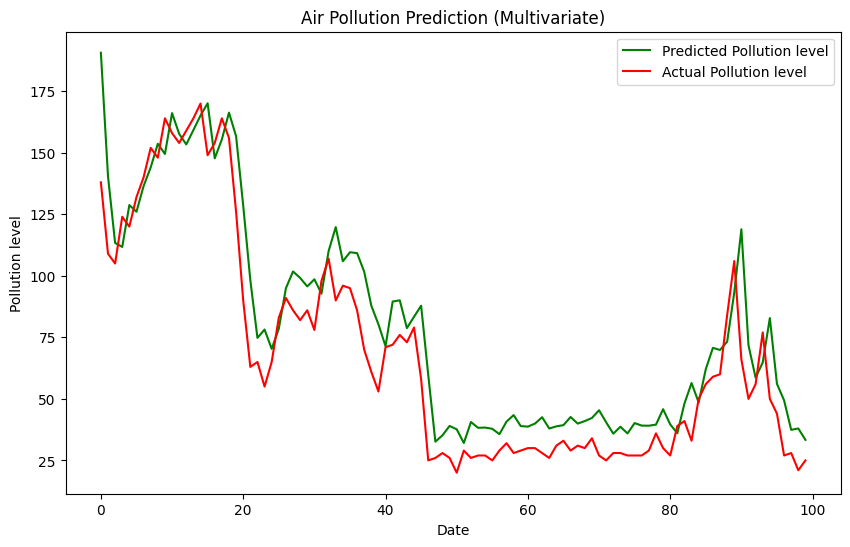

<Figure size 640x480 with 0 Axes>

In [34]:
#Plot the graph between actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(Y_predicted[:100,:], color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested[:100,:] , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("Pollution level")
plt.legend()
plt.show()
plt.savefig('graph.png')

In [35]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
print('MAPE', mape)


MAPE inf


/tmp/ipython-input-249640264.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)
#print('Mean squared error', mse)
print('RMSE' , np.sqrt(mse))
print("Mean of Test data ", np.mean(Y_tested))

RMSE 29.1269310568925
Mean of Test data  96.041435
